# Drawing Conclusions
Use the space below to address questions on datasets `clean_08.csv` and `clean_18.csv`. You should've created these data files in the previous section: *Fixing Data Types Pt 3*.

In [1]:
# load datasets
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
df_08 = pd.read_csv('clean_08.csv')
df_18 = pd.read_csv('clean_18.csv')

In [2]:
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no


In [3]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No


### Q1: Are more unique models using alternative sources of fuel? By how much?

In [5]:
#df_08['model'].value_counts()

In [4]:
df_08['fuel'].value_counts()

Gasoline    982
ethanol       3
gas           3
CNG           1
Name: fuel, dtype: int64

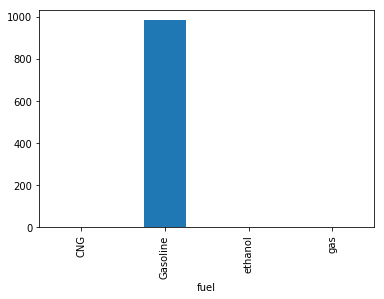

In [6]:
counts = df_08.groupby('fuel')['model'].count()
counts.plot(kind='bar')

### Q2: How much have vehicle classes improved in fuel economy?  

In [2]:
veh_08 = df_08.groupby('model')['cmb_mpg'].mean()
veh_08

model
ACURA MDX                            17.000000
ACURA RDX                            19.000000
ACURA RL                             19.000000
ACURA TL                             20.666667
ACURA TSX                            22.500000
ASTON MARTIN DB9                     12.500000
ASTON MARTIN DB9 Volante             12.500000
ASTON MARTIN V8 Vantage              15.000000
AUDI A3                              23.333333
AUDI A4                              21.000000
AUDI A4 Avant                        19.500000
AUDI A4 Cabriolet                    20.000000
AUDI A6                              19.666667
AUDI A6 Avant                        20.000000
AUDI A8                              18.000000
AUDI A8 L                            16.500000
AUDI Q7                              15.000000
AUDI R8                              15.000000
AUDI RS4                             15.000000
AUDI RS4 Cabriolet                   14.000000
AUDI S4                              15.500000
AUDI S4

In [3]:
veh_18 = df_18.groupby('model')['cmb_mpg'].mean()
veh_18

model
ACURA RDX                             22.500000
ACURA TLX                             25.000000
ACURA TLX AWD A-SPEC                  23.000000
ACURA TLX FWD A-SPEC                  23.000000
ALFA ROMEO 4C                         28.000000
ALFA ROMEO Giulia                     20.000000
AUDI A3                               28.000000
AUDI A3 Cabriolet                     26.500000
AUDI A4                               27.000000
AUDI A4 Ultra                         31.000000
AUDI A5                               27.000000
AUDI A5 Cabriolet                     27.000000
AUDI A5 Sportback quattro             27.000000
AUDI A6                               25.666667
AUDI A7                               23.000000
AUDI A8 L                             22.000000
AUDI Q3                               23.000000
AUDI Q5                               25.000000
AUDI Q7                               21.000000
AUDI RS3                              22.000000
AUDI S3                           

In [4]:
diff = veh_18 - veh_08
diff

model
ACURA MDX                                  NaN
ACURA RDX                             3.500000
ACURA RL                                   NaN
ACURA TL                                   NaN
ACURA TLX                                  NaN
ACURA TLX AWD A-SPEC                       NaN
ACURA TLX FWD A-SPEC                       NaN
ACURA TSX                                  NaN
ALFA ROMEO 4C                              NaN
ALFA ROMEO Giulia                          NaN
ASTON MARTIN DB9                           NaN
ASTON MARTIN DB9 Volante                   NaN
ASTON MARTIN V8 Vantage                    NaN
AUDI A3                               4.666667
AUDI A3 Cabriolet                          NaN
AUDI A4                               6.000000
AUDI A4 Avant                              NaN
AUDI A4 Cabriolet                          NaN
AUDI A4 Ultra                              NaN
AUDI A5                                    NaN
AUDI A5 Cabriolet                          NaN
AUDI A5

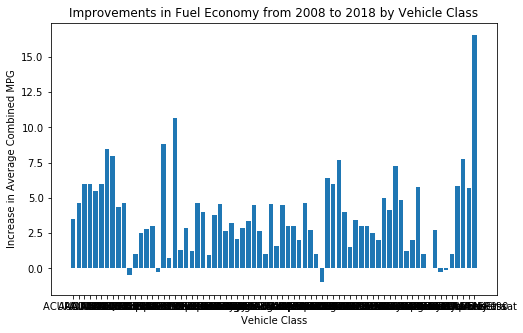

In [7]:
diff.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(diff.index, diff)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [6]:
df_08['smartway'].describe()

count     989
unique      2
top        no
freq      609
Name: smartway, dtype: object

In [7]:
df_18['smartway'].describe()

count     832
unique      3
top        No
freq      724
Name: smartway, dtype: object

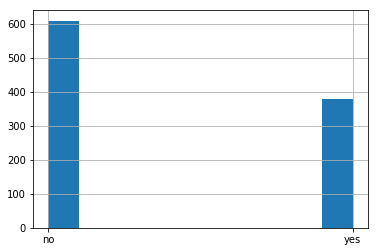

In [10]:
df_08['smartway'].hist();

### Q4: What features are associated with better fuel economy?

In [7]:
df_08['cmb_mpg'].median()

20.0

In [8]:
df_1 = df_08.query('cmb_mpg >= 20')

In [9]:
df_1.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,2.669098,4.894434,6.986564,20.309021,27.593090,22.984645,6.637236
std,0.664588,1.035146,1.172117,3.195323,3.049507,2.923340,0.804360
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000
